# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on medical atributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement, given clinical parameters about a patient, can we predict whether or not someone has heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle.  
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll purse the project.

## 4. Features

* age in years
* sex (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mg Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restcg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced anigma (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slop - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target - 1 or 0

## Preparing the tools


In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [486]:
# Loading data
df = pd.read_csv('/Users/igorbartkowski/Downloads/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data exploration

In [487]:
df.shape

(303, 14)

In [488]:
# How many of each class there is
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

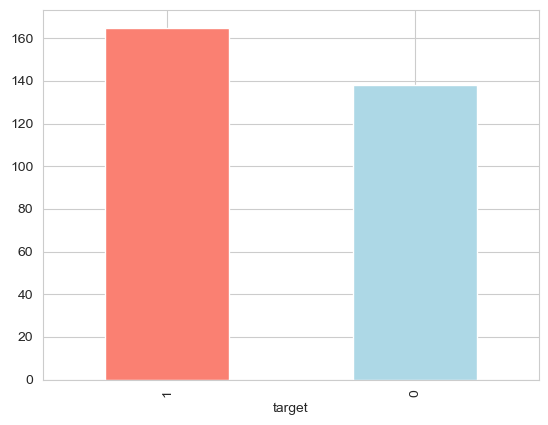

In [489]:
df.target.value_counts().plot.bar(color=['salmon', 'lightblue']);

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [491]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [492]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [493]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [494]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


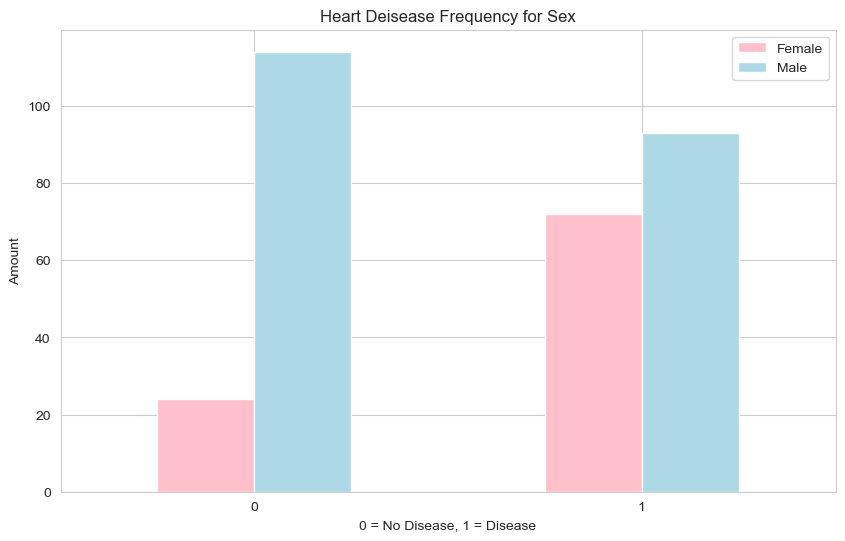

In [495]:
# Plot of crosstab
pd.crosstab(df.target, df.sex).plot.bar(color=['pink', 'lightblue'], figsize=(10, 6))
plt.title('Heart Deisease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);  

### Age vs. Max HR for Heart Disease

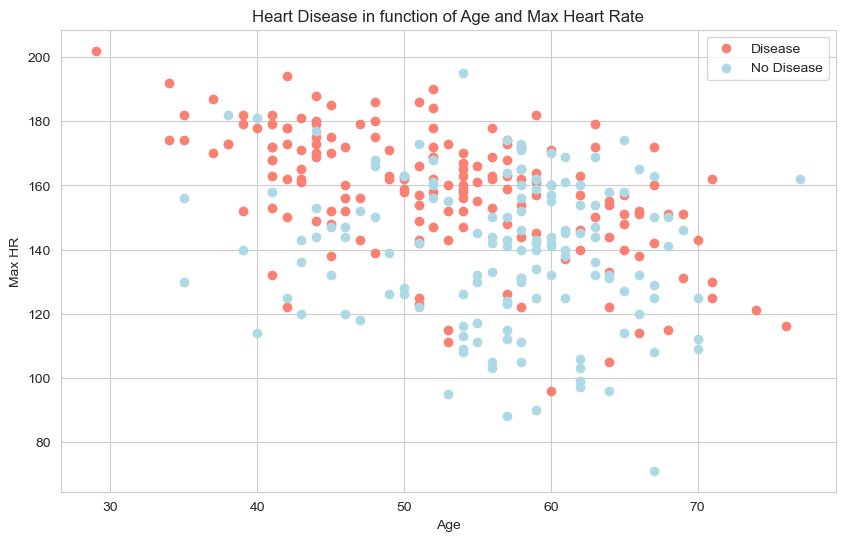

In [496]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df.age[df.target==1], df.thalach[df.target==1], c='salmon')
ax.scatter(df.age[df.target==0], df.thalach[df.target==0], c='lightblue')
ax.legend(['Disease', 'No Disease'])
ax.set(xlabel='Age', ylabel='Max HR')
ax.title.set_text('Heart Disease in function of Age and Max Heart Rate');

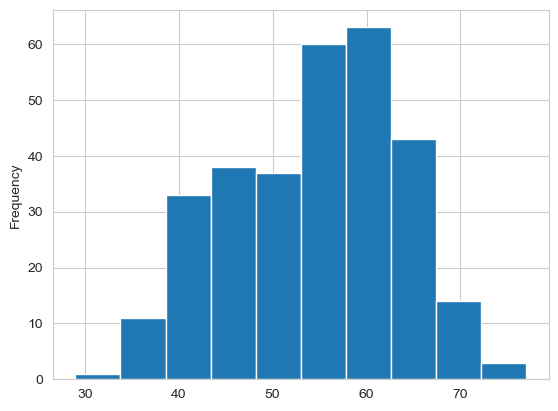

In [497]:
# What is the distribution of the age column?
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

cp - chest pain type:
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical anginca: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [498]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


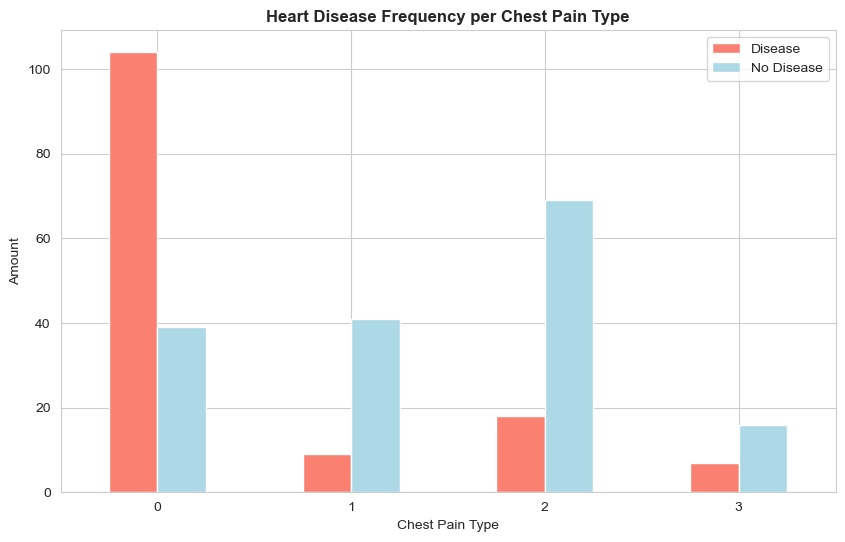

In [499]:
# Visual the cross tab
pd.crosstab(df.cp, df.target).plot.bar(figsize=(10,6), color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency per Chest Pain Type', fontweight='bold')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['Disease', 'No Disease'])
plt.xticks(rotation=0);

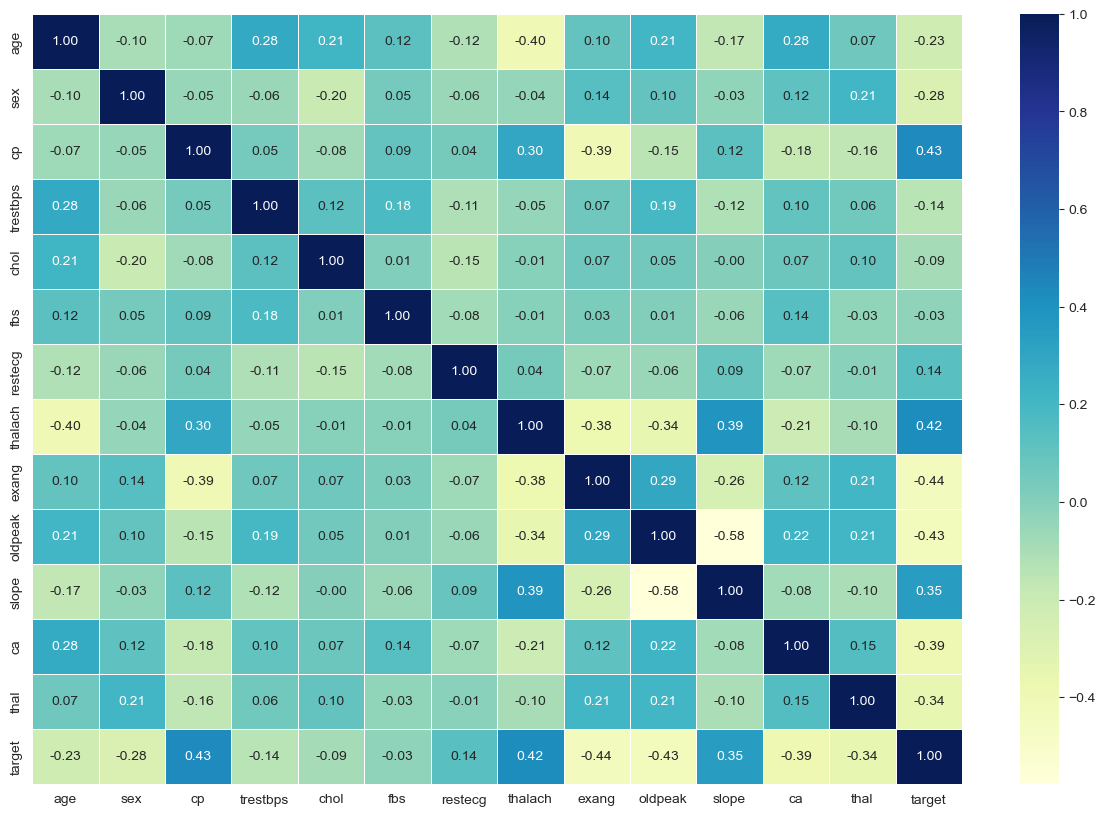

In [500]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=.5, fmt='.2f', cmap='YlGnBu');

## 5. Modelling

In [501]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [502]:
# Split the data
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Now we'll build a machine learning model.

We're goint to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [503]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(max_iter=1000),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(model, X_train, X_test, y_train, y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    for name, score in model_scores.items():
        print(f'{name}: {score * 100:.2f}%')

In [504]:
fit_and_score(models, X_train, X_test, y_train, y_test)

Logistic Regression: 85.25%
KNN: 62.30%
Random Forest: 81.97%


/opt/anaconda3/envs/py3-TF2.0/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Hyperparameter tuning

KNN

In [505]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 67.21%


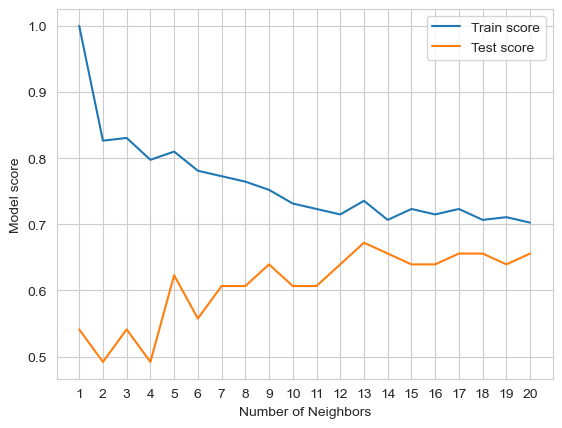

In [506]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(range(1, 21))
plt.legend(loc='best')
plt.xlabel('Number of Neighbors')
plt.ylabel('Model score')

print(f'Maximum KNN score on the test data: {max(test_scores) * 100:.2f}%')

## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()


In [507]:
# Create a grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear'],
                'max_iter': [1000]}

# Create a grid for RandomForestClassifier
ran_for_grid = {'n_estimators': np.arange(100, 1000, 100),
                'max_depth': [None, 3, 5, 10, 20, 30],
                'min_samples_split': [2, 5, 8],
                'min_samples_leaf': [1, 2, 4]}

In [508]:
# Tune LogisticRegression()
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid,
                                cv=5, n_iter=20, verbose=True)
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [509]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 1000, 'C': 1.623776739188721}

In [510]:
print('Logistic Regression')
rs_log_reg.score(X_test, y_test)

Logistic Regression


0.819672131147541

In [511]:
# Tune RandomForestClassifier()

rs_ran_for = RandomizedSearchCV(RandomForestClassifier(), param_distributions=ran_for_grid,
                                cv=5, n_iter=100, verbose=True, n_jobs=-1)
rs_ran_for.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [512]:
rs_ran_for.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [513]:
print('Random Forest')
rs_ran_for.score(X_test, y_test)

Random Forest


0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

In [514]:
# Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear'],
                'max_iter': [1000]}

gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,
                          cv=5, n_jobs=-1, verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [515]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'max_iter': 1000, 'solver': 'liblinear'}

In [516]:
gs_log_reg.score(X_test, y_test)

0.819672131147541

In [517]:
# Random Forest
ran_for_grid = {'n_estimators': [400, 500, 600, 800],
                'min_samples_split': [2, 4, 5, 7],
                'min_samples_leaf': [1, 2],
                'max_depth': [None, 3, 5]}

gs_ran_for = GridSearchCV(RandomForestClassifier(), param_grid=ran_for_grid,
                          cv=5, n_jobs=-1, verbose=True)
gs_ran_for.fit(X_train, y_train);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [518]:
gs_ran_for.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 500}

In [519]:
gs_ran_for.score(X_test, y_test)

0.8688524590163934

## Evaluating our tuned machine learning classifier, beyond accuracy

* Confusion matrix
* Classification report
* Precision
* Recall
* f1_score

To make comparisons and evaluate our trained model, first we need to make predictions

In [520]:
# Make predictions with trained model
y_preds = gs_log_reg.predict(X_test)

In [521]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[18  7]
 [ 4 32]]


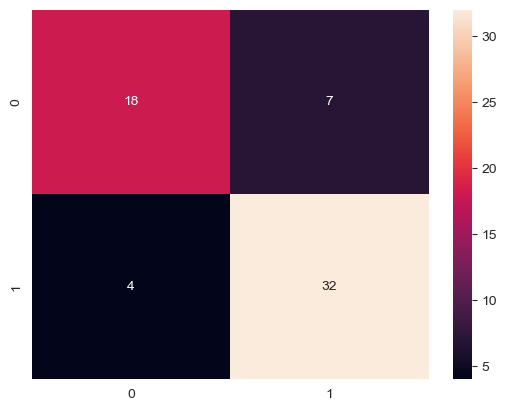

In [522]:
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True);

In [523]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.82      0.89      0.85        36

    accuracy                           0.82        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [534]:
# Cross validation of Precision, Accuracy, Recall and F1 score

clf_lr = LogisticRegression(solver='liblinear',
                            max_iter=1000,
                            C=1.3738237958832638)

acc_lr = cross_val_score(clf_lr, X, y, cv=5, scoring='accuracy').mean()
prec_lr = cross_val_score(clf_lr, X, y, cv=5, scoring='precision').mean()
rec_lr = cross_val_score(clf_lr, X, y, cv=5, scoring='recall').mean()
f1_lr = cross_val_score(clf_lr, X, y, cv=5, scoring='f1').mean()

print('Logistic Regression:\n')
print(f'Accuracy score: {acc_lr*100:.2f}%')
print(f'Precision score: {prec_lr*100:.2f}%')
print(f'Recall score: {rec_lr*100:.2f}%')
print(f'F1 score: {f1_lr*100:.2f}%')

Logistic Regression:

Accuracy score: 82.15%
Precision score: 81.79%
Recall score: 87.27%
F1 score: 84.32%


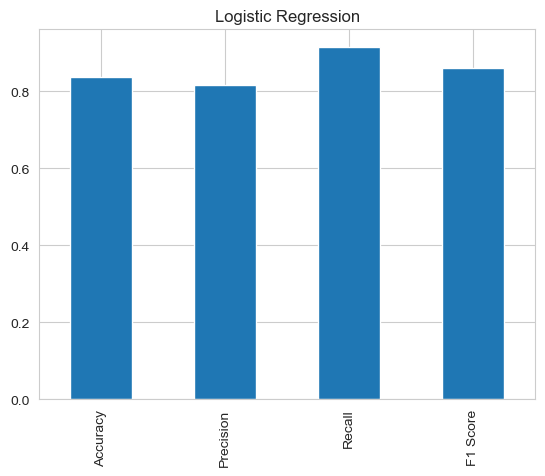

In [525]:
cv_metrics_lr = pd.DataFrame({'Accuracy': acc_lr, 'Precision': prec_lr, 'Recall': rec_lr,
                              'F1 Score': f1_lr}, index=[0])
cv_metrics_lr.T.plot.bar(legend=False)
plt.title('Logistic Regression');

In [533]:
clf_rf = RandomForestClassifier(max_depth=None,
                             min_samples_leaf=2,
                             min_samples_split=5,
                             n_estimators=500)

acc_rf = cross_val_score(clf_rf, X, y, cv=5, scoring='accuracy').mean()
prec_rf = cross_val_score(clf_rf, X, y, cv=5, scoring='precision').mean()
rec_rf = cross_val_score(clf_rf, X, y, cv=5, scoring='recall').mean()
f1_rf = cross_val_score(clf_rf, X, y, cv=5, scoring='f1').mean()

print('Random Forest CLassifier:\n')
print(f'Accuracy score: {acc_rf*100:.2f}%')
print(f'Precision score: {prec_rf*100:.2f}%')
print(f'Recall score: {rec_rf*100:.2f}%')
print(f'F1 score: {f1_rf*100:.2f}%')

Random Forest CLassifier:

Accuracy score: 83.81%
Precision score: 84.09%
Recall score: 87.27%
F1 score: 84.67%


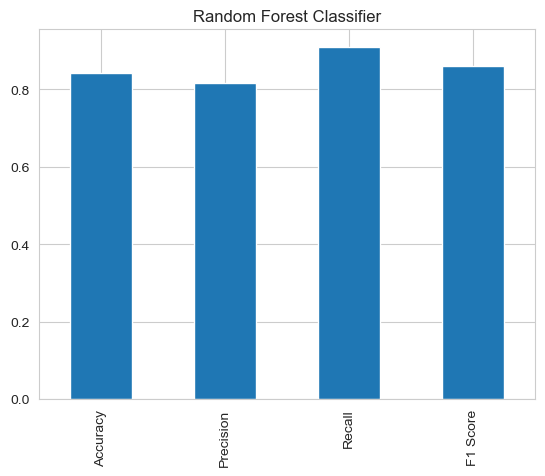

In [527]:
cv_metrics_rf = pd.DataFrame({'Accuracy': acc_rf, 'Precision': prec_rf, 'Recall': rec_rf,
                              'F1 Score': f1_rf}, index=[0])
cv_metrics_rf.T.plot.bar(legend=False)
plt.title('Random Forest Classifier');

### Feature Importance

In [528]:
# Check coef_
clf_lr.fit(X_train, y_train).coef_

array([[ 0.01070808, -1.05388402,  0.65825157, -0.01877274, -0.00325549,
        -0.11304726,  0.27997148,  0.03380543, -0.57379543, -0.54510555,
         0.30647516, -0.61252614, -0.71837743]])

In [529]:
# Match coef's of features to columns - Logistic Regression
feature_dict = dict(zip(df.columns, list(clf_lr.coef_[0])))
feature_dict

{'age': 0.010708080501342648,
 'sex': -1.0538840166392005,
 'cp': 0.6582515684375085,
 'trestbps': -0.01877273933756147,
 'chol': -0.00325549239652782,
 'fbs': -0.11304725872522685,
 'restecg': 0.27997148377551206,
 'thalach': 0.03380542612438929,
 'exang': -0.5737954310123345,
 'oldpeak': -0.545105549560895,
 'slope': 0.3064751607553823,
 'ca': -0.612526144015397,
 'thal': -0.7183774251455421}

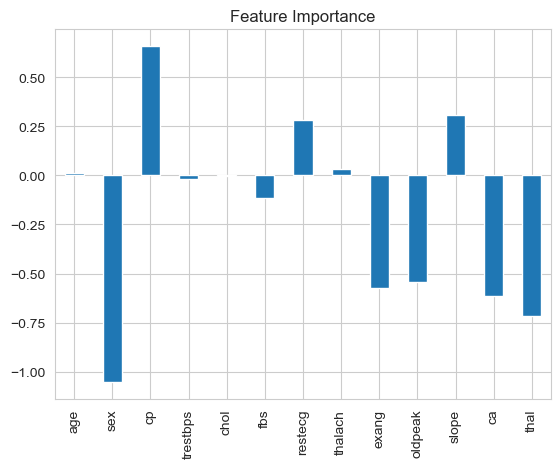

In [530]:
# Visualize feature importance
feauture_df = pd.DataFrame(feature_dict, index=[0])
feauture_df.T.plot.bar(title='Feature Importance', legend=False);